### This program uses the Moving Average Convegence/Divergence (MACD) crossover to determine when to buy and sell stock

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AAPL.csv', index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-15,124.339996,127.900002,124.129997,127.879997,127.096474,157243700
2020-12-16,127.410004,128.369995,126.559998,127.809998,127.026901,98208600
2020-12-17,128.899994,129.580002,128.039993,128.699997,127.911446,94359800
2020-12-18,128.960007,129.100006,126.120003,126.660004,125.883957,192541500
2020-12-21,125.019997,128.309998,123.449997,128.229996,127.444328,121251600
...,...,...,...,...,...,...
2021-12-09,174.910004,176.750000,173.919998,174.559998,174.559998,108923700
2021-12-10,175.210007,179.630005,174.690002,179.449997,179.449997,115228100
2021-12-13,181.119995,182.130005,175.529999,175.740005,175.740005,153237000


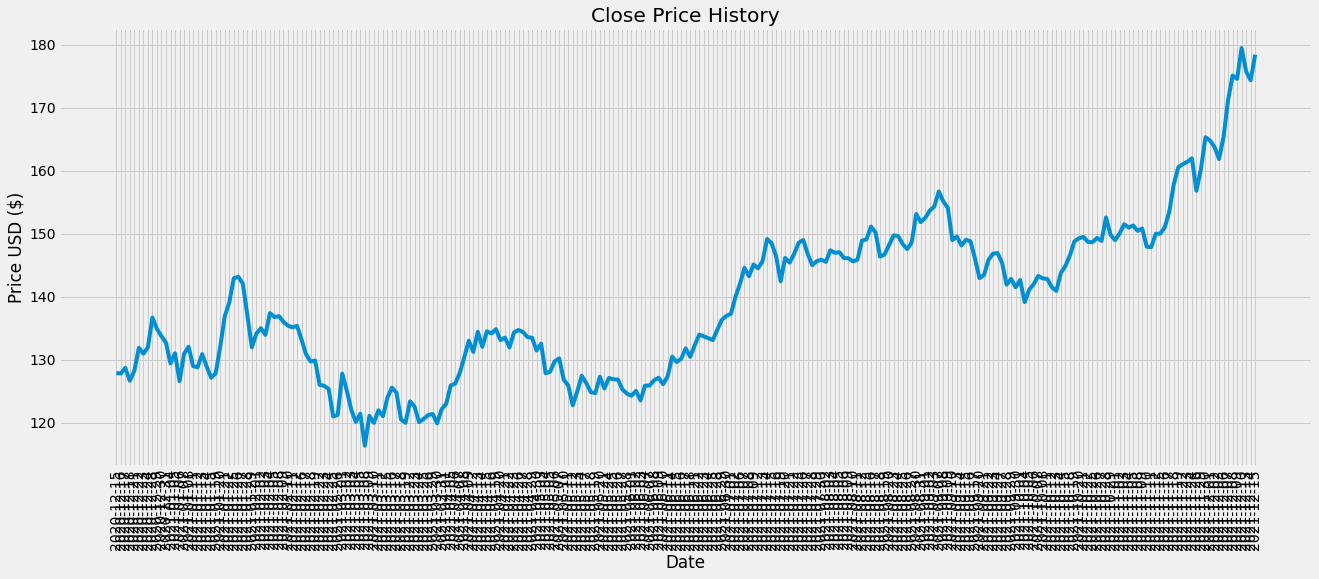

In [3]:
plt.figure(figsize=(20, 7.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=90)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [4]:
#cal short term exp moving avg
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#cal long term exp moving avg
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#cal MACD line
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

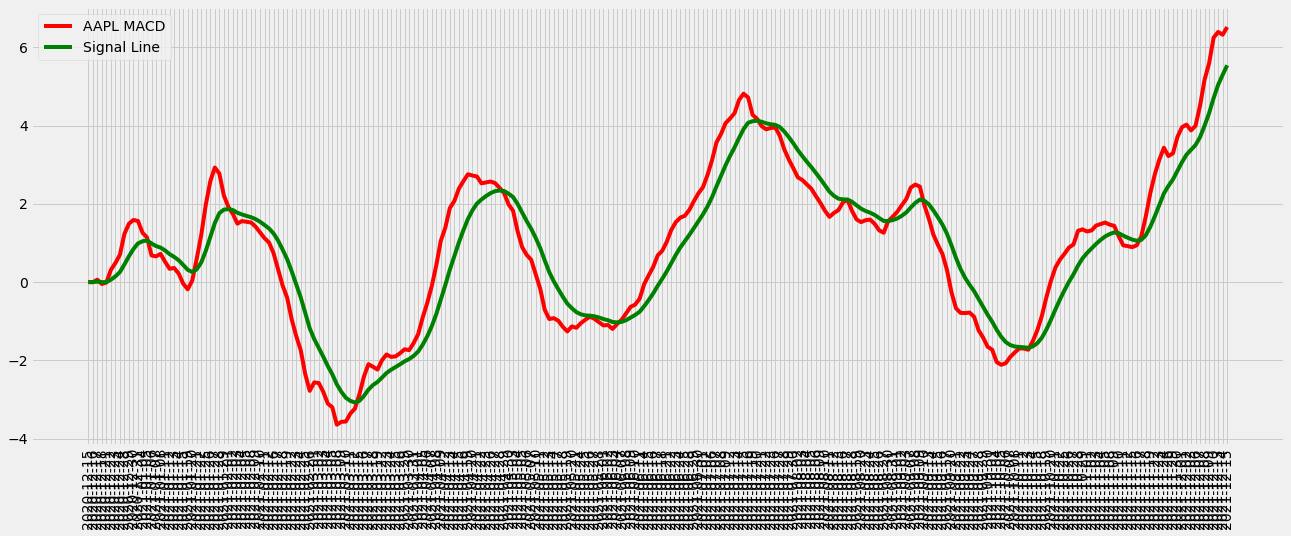

In [5]:
plt.figure(figsize=(20, 7.5))
plt.plot(df.index, MACD, label='AAPL MACD', color='red')
plt.plot(df.index, signal, label='Signal Line', color='green')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [6]:
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2020-12-15,124.339996,127.900002,124.129997,127.879997,127.096474,157243700,0.000000,0.000000
2020-12-16,127.410004,128.369995,126.559998,127.809998,127.026901,98208600,-0.005584,-0.001117
2020-12-17,128.899994,129.580002,128.039993,128.699997,127.911446,94359800,0.061102,0.011327
2020-12-18,128.960007,129.100006,126.120003,126.660004,125.883957,192541500,-0.050082,-0.000955
2020-12-21,125.019997,128.309998,123.449997,128.229996,127.444328,121251600,-0.011380,-0.003040
...,...,...,...,...,...,...,...,...
2021-12-09,174.910004,176.750000,173.919998,174.559998,174.559998,108923700,5.591182,4.316292
2021-12-10,175.210007,179.630005,174.690002,179.449997,179.449997,115228100,6.245824,4.702198
2021-12-13,181.119995,182.130005,175.529999,175.740005,175.740005,153237000,6.391588,5.040076


In [7]:
def buy_sell(signal):
    buy = []
    sell = []
    flag = -1
    
    for i in range(len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return buy, sell

In [11]:
temp = buy_sell(df)
df['Buy Signal Price'], df['Sell Signal Price'] = temp

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy Signal Price,Sell SIgnal Price,Sell Signal Price
Date,,,,,,,,,,,
2020-12-15,124.339996,127.900002,124.129997,127.879997,127.096474,157243700,0.000000,0.000000,NaN,NaN,NaN
2020-12-16,127.410004,128.369995,126.559998,127.809998,127.026901,98208600,-0.005584,-0.001117,NaN,127.809998,127.809998
2020-12-17,128.899994,129.580002,128.039993,128.699997,127.911446,94359800,0.061102,0.011327,128.699997,NaN,NaN
2020-12-18,128.960007,129.100006,126.120003,126.660004,125.883957,192541500,-0.050082,-0.000955,NaN,126.660004,126.660004
2020-12-21,125.019997,128.309998,123.449997,128.229996,127.444328,121251600,-0.011380,-0.003040,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09,174.910004,176.750000,173.919998,174.559998,174.559998,108923700,5.591182,4.316292,NaN,NaN,NaN
2021-12-10,175.210007,179.630005,174.690002,179.449997,179.449997,115228100,6.245824,4.702198,NaN,NaN,NaN
2021-12-13,181.119995,182.130005,175.529999,175.740005,175.740005,153237000,6.391588,5.040076,NaN,NaN,NaN


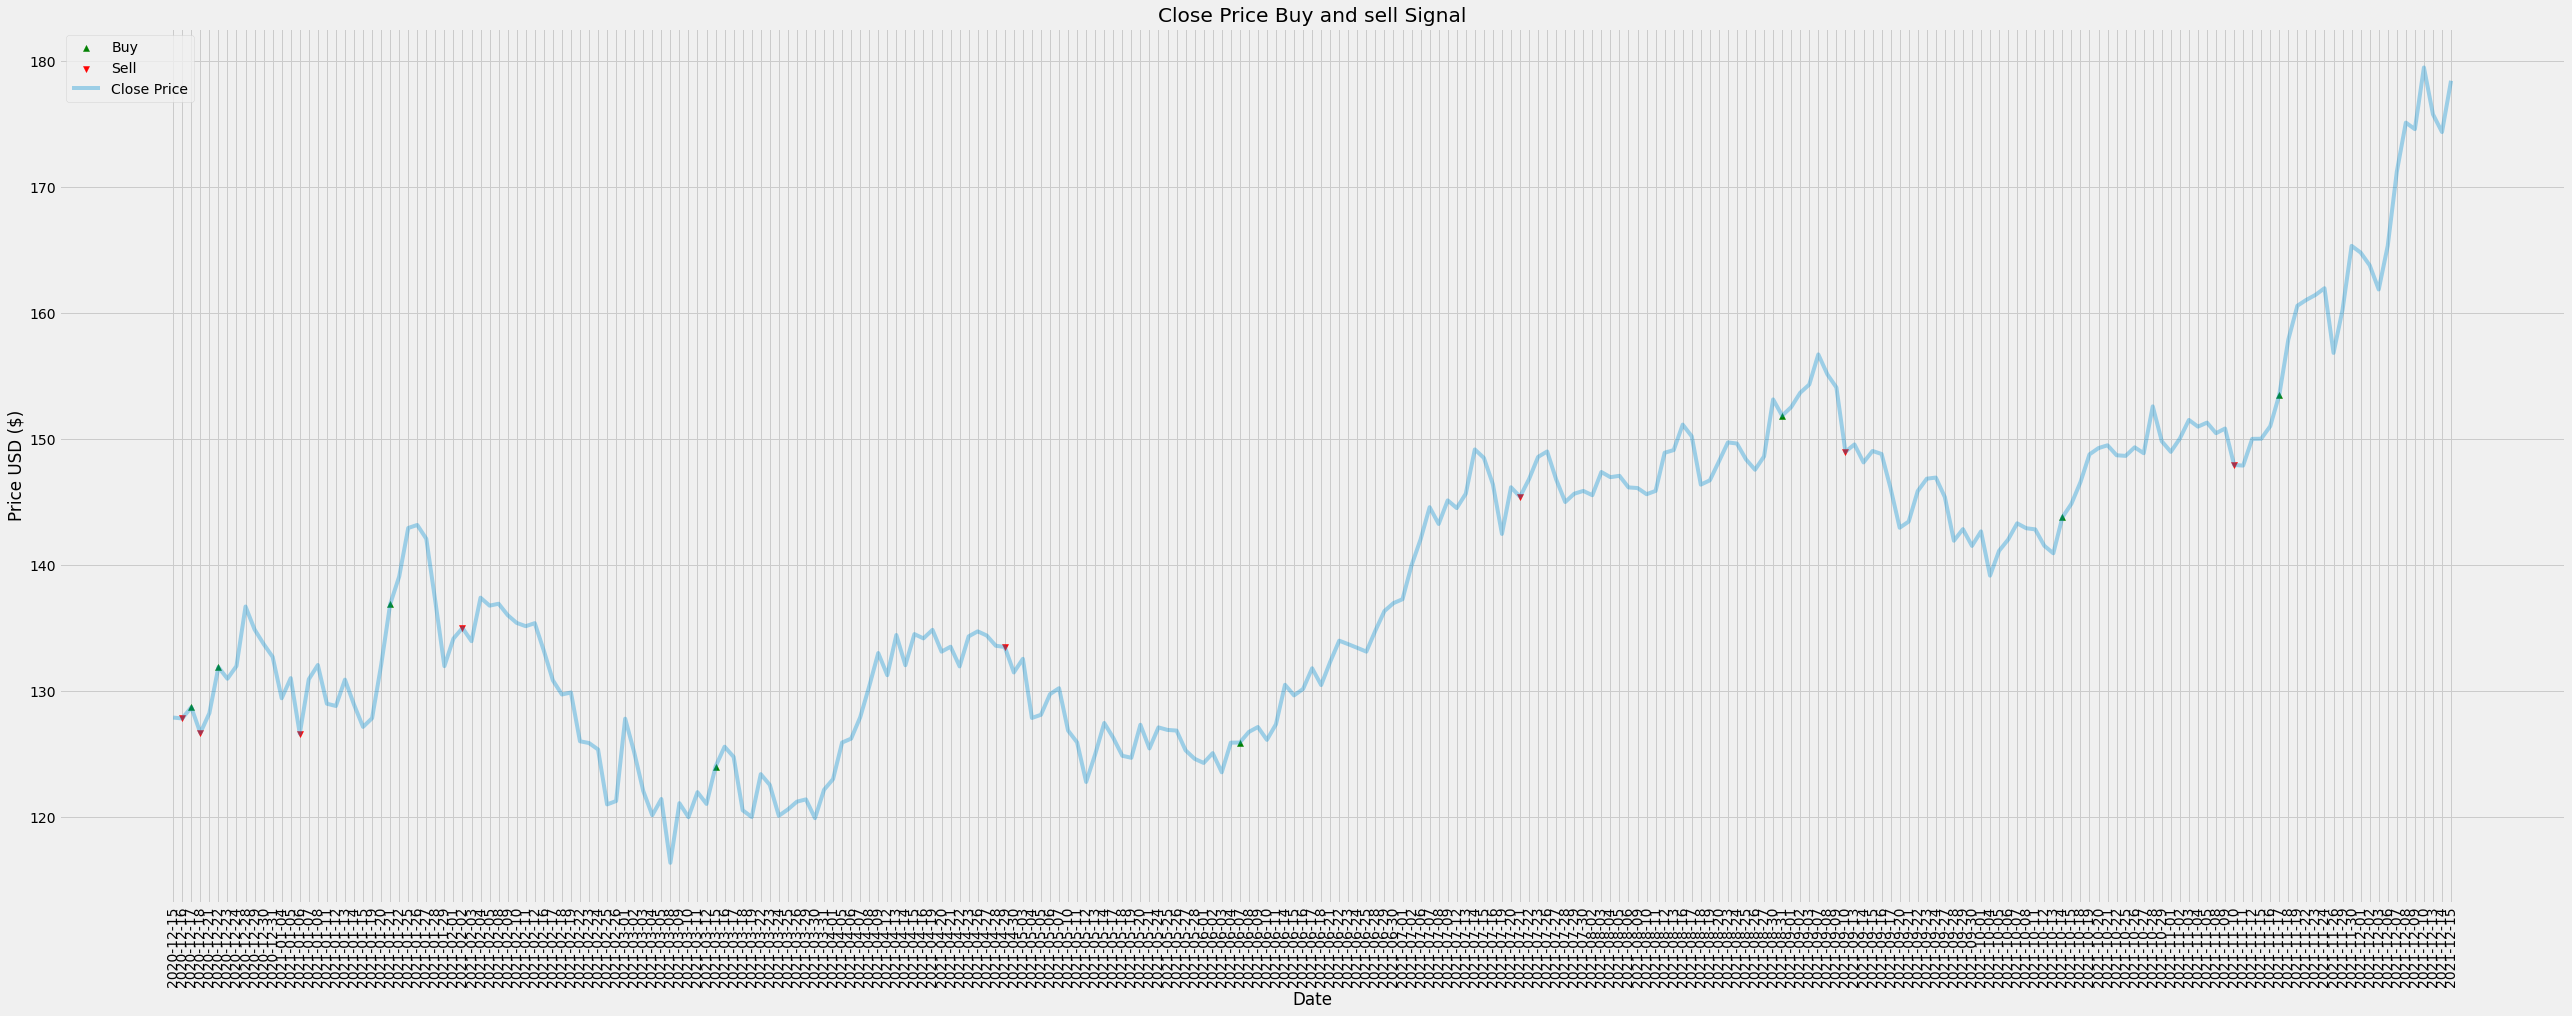

In [17]:
plt.figure(figsize=(40,15))
plt.scatter(df.index, df['Buy Signal Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell Signal Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy and sell Signal')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()